In [ ]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 37.0 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=e690b94663cd2765e680f05f68b33473d0f9129689cfccddc0daea58d4c743b0
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

In [ ]:
# Load the job offers dataset
data = pd.read_csv("FinalDataSetJobOffers.csv")

In [ ]:
# Get job descriptions as a list of strings
texts = data["Job description"].tolist()

In [ ]:
# Load SentenceTransformer model
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [ ]:
# Encode job descriptions as sentence embeddings
embeddings = model.encode(texts)

In [ ]:
# Perform clustering with KMeans
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
# Get cluster assignments
cluster_assignments = kmeans.labels_

In [ ]:
# Print results
for i in range(num_clusters):
    cluster = [j for j, c in enumerate(cluster_assignments) if c == i]
    print(f"Cluster {i}: {len(cluster)} job offers")
    print(data.iloc[cluster]["Job description"].tolist())
    print("\n")

Cluster 0: 4447 job offers
['graduat prefer immedi joiner candid resid mumbai applyc ...', 'certif requiredskil requir function soft skill ccna prefer is27002 ...', 'desir candid profile- candid good commun skill knowledg ...', 'must work well within team environ enjoy work offic ...', 'atleast 1 year relev experi prefer softwar develop data ...', 'educ be/ b tech/ me/ tech m strong verilog c/c++ object orient programmi ...', 'bachelor engin good understand sql sql databas good understand ...', 'branch c ece/e strong c/c++ object orient program skill sound knowledg ...', 'role respons manag team top-notch softwar develop build prod ...', 'requir technic profession expertis prefer technic profession exp ...', 'profession attribut 1 good commun skill 2 leadership mento ...', 'profession attribut 1 good interperson skill 2 good technic write ski ...', 'role respons manag team top-notch softwar develop build prod ...', 'responsibilitiesth product analyst po strong analyt skill good ...', '

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Print cluster assignments
print("Cluster assignments:")
print(cluster_assignments)


Cluster assignments:
[3 1 3 ... 4 4 4]


In [ ]:
# Print score
print("Score:", kmeans.inertia_)

Score: 3004102.75


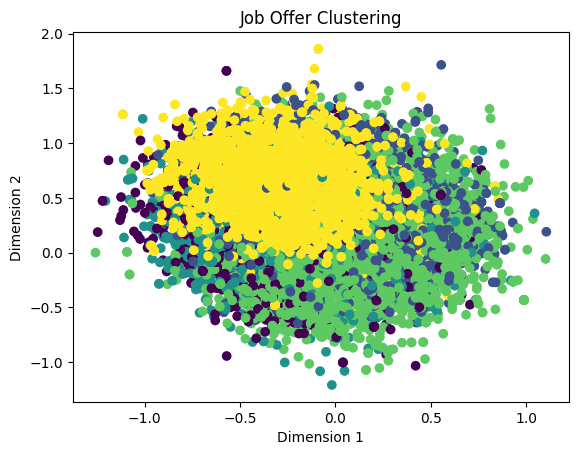

In [ ]:
import matplotlib.pyplot as plt
# Create scatter plot
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=cluster_assignments)
plt.title("Job Offer Clustering")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

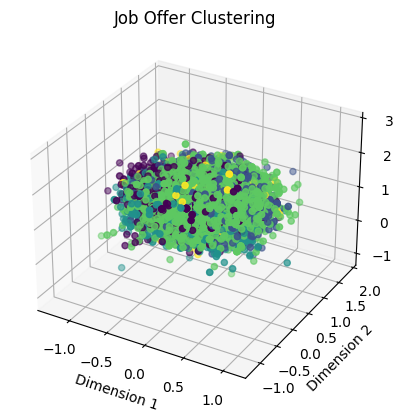

In [ ]:
# Create scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=cluster_assignments)
ax.set_title("Job Offer Clustering")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")
plt.show()

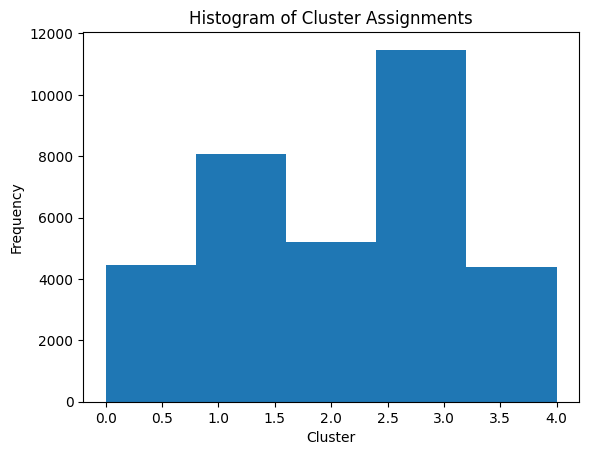

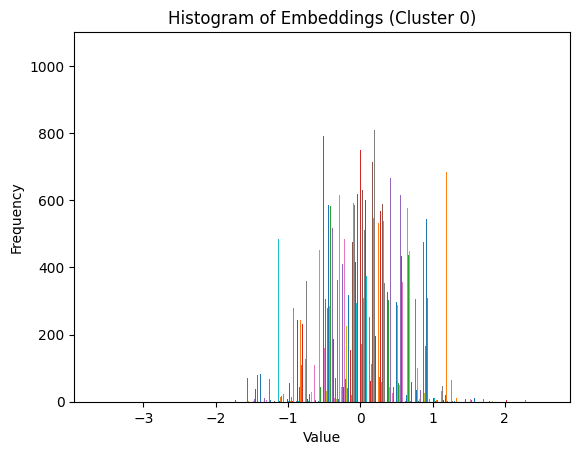

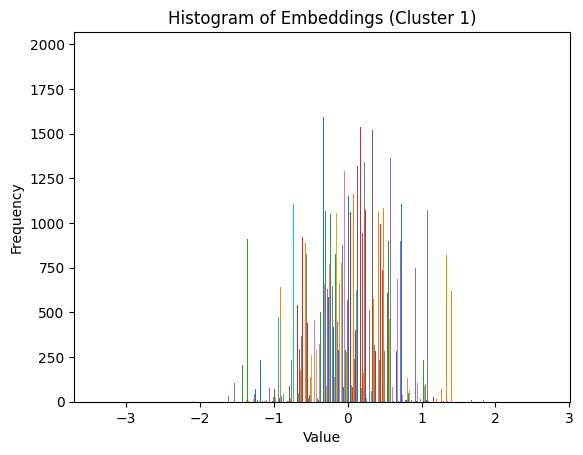

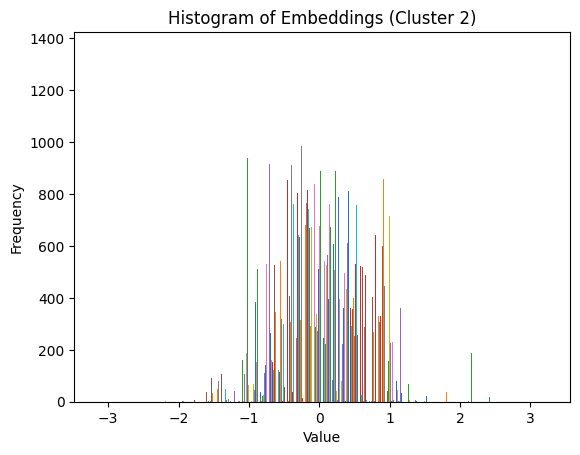

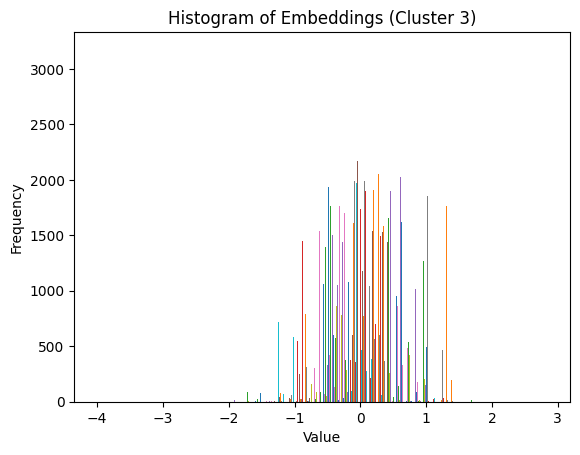

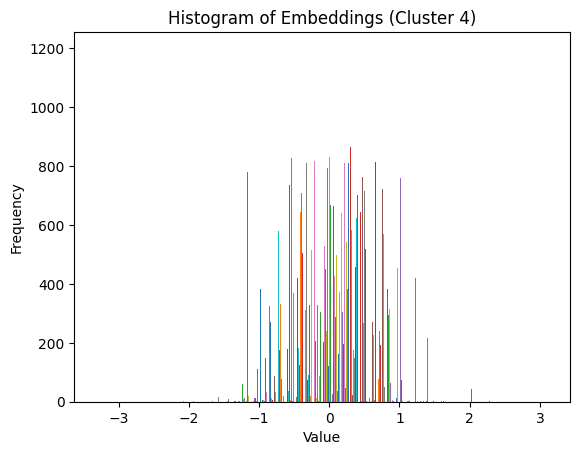

In [ ]:
import matplotlib.pyplot as plt

# Create histograms of cluster assignments
plt.hist(cluster_assignments, bins=num_clusters)
plt.title("Histogram of Cluster Assignments")
plt.xlabel("Cluster")
plt.ylabel("Frequency")
plt.show()

# Create histograms of embeddings within each cluster
for i in range(num_clusters):
    cluster = [j for j, c in enumerate(cluster_assignments) if c == i]
    plt.hist(embeddings[cluster], bins=50)
    plt.title(f"Histogram of Embeddings (Cluster {i})")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()